# Credit EDA Case Study



In [5]:

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print("Python: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("Pandas: {}".format(pandas.__version__))
print("MatplotLib: {}".format(matplotlib.__version__))
print("Seaborn: {}".format(seaborn.__version__))
print("Scipy: {}".format(scipy.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.5
Pandas: 0.25.1
MatplotLib: 3.1.1
Seaborn: 0.9.0
Scipy: 1.3.1


In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#loading the dataset from csv file using pandas
previous_application = pd.read_csv(r'E:\Data Science\EDA Case Study\previous_application.csv')

In [7]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#explore the dataset
print(previous_application.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [9]:
print(previous_application.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

In [10]:
print(previous_application.shape)

(1670214, 37)


In [11]:
print(previous_application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [12]:
#loading the dataset from csv file using pandas
application_data = pd.read_csv(r'E:\Data Science\EDA Case Study\application_data.csv')

In [13]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#explore the dataset
print(application_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [15]:
#Examine the data 
print(application_data.shape)

(307511, 122)


In [18]:
print(application_data.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [60]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     252137 non-null int64
TARGET                         252137 non-null int64
NAME_CONTRACT_TYPE             252137 non-null object
CODE_GENDER                    252137 non-null object
FLAG_OWN_CAR                   252137 non-null object
FLAG_OWN_REALTY                252137 non-null object
CNT_CHILDREN                   252137 non-null int64
AMT_INCOME_TOTAL               252137 non-null float64
AMT_CREDIT                     252137 non-null float64
AMT_ANNUITY                    252137 non-null float64
NAME_INCOME_TYPE               252137 non-null object
NAME_EDUCATION_TYPE            252137 non-null object
NAME_FAMILY_STATUS             252137 non-null object
NAME_HOUSING_TYPE              252137 non-null object
REGION_POPULATION_RELATIVE     252137 non-null float64
DAYS_BIRTH                     252137 non-null int64
DAYS_EMPLOYED            

In [19]:
# Finding percentage of NAN in the previous_application
previous_application_NAN_percent = round(100*(previous_application.isnull().sum()/len(previous_application.index)), 2)
previous_application_NAN_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [23]:
#Removing columns with more than 50% Nans
previous_application = previous_application.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT'],axis =1)
print(previous_application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_TYP

In [24]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data[numeric_columns]=application_data[numeric_columns].apply(pd.to_numeric)
application_data.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptyColName_application_data=application_data.isnull().sum()
emptyColName_application_data=emptyColName_application_data[emptyColName_application_data.values>(0.3*len(emptyColName_application_data))]
len(emptyColName_application_data)


64

In [26]:
# Removing those 64 columns
emptyColName_application_data = list(emptyColName_application_data[emptyColName_application_data.values>=0.3].index)
application_data.drop(labels=emptyColName_application_data,axis=1,inplace=True)
print(len(emptyColName_application_data))

64


In [27]:
application_data_NAN_percent = round(100*(application_data.isnull().sum()/len(application_data.index)), 6)
application_data_NAN_percent

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing banks with median value

In [28]:
# Filling missing values with median

median_values=application_data['AMT_ANNUITY'].median()

application_data.loc[application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=median_values

In [29]:
# columns having null values

application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [30]:
# Removing rows having null values greater than or equal to 30%

emptyrow=application_data.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(application_data)].index)
application_data.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [31]:
# We will remove unwanted columns from application_data dataset

unwantedColumns_application_data=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unwantedColumns_application_data,axis=1,inplace=True)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [32]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column

application_data[application_data['CODE_GENDER']=='XNA'].shape

(4, 28)

In [33]:
# For Organization column

application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [34]:
#Describing the Gender column to check the number of females and males

application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
# Since Female is majority so we are updating the column 'CODE_GENDER' with "F" for the dataset

application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [22]:
application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [36]:
application_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

For column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [37]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

application_data=application_data.drop(application_data.loc[application_data['ORGANIZATION_TYPE']=='XNA'].index)
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [38]:
#merging datasets
application_prev_dataSet = application_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [39]:
#knowning the shape of the merged dataset 
print(application_prev_dataSet.shape)

(1140118, 60)


In [40]:
print(application_prev_dataSet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140118 entries, 0 to 1140117
Data columns (total 60 columns):
SK_ID_CURR                      1140118 non-null int64
TARGET                          1140118 non-null int64
NAME_CONTRACT_TYPE_x            1140118 non-null object
CODE_GENDER                     1140118 non-null object
FLAG_OWN_CAR                    1140118 non-null object
FLAG_OWN_REALTY                 1140118 non-null object
CNT_CHILDREN                    1140118 non-null int64
AMT_INCOME_TOTAL                1140118 non-null float64
AMT_CREDIT_x                    1140118 non-null float64
AMT_ANNUITY_x                   1140118 non-null float64
NAME_INCOME_TYPE                1140118 non-null object
NAME_EDUCATION_TYPE             1140118 non-null object
NAME_FAMILY_STATUS              1140118 non-null object
NAME_HOUSING_TYPE               1140118 non-null object
REGION_POPULATION_RELATIVE      1140118 non-null float64
DAYS_BIRTH                      1140118 non-nu

In [28]:
application_prev_dataSet.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:

#explore the dataset
print(application_prev_dataSet.columns)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START_y',
       'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISI

In [42]:
#Cast all continuos variables to numeric
#Cast all continuos variables to numeric so that we can find a correlation between them
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_CREDIT_y','AMT_ANNUITY_y','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_prev_dataSet[numeric_columns]=application_prev_dataSet[numeric_columns].apply(pd.to_numeric)
application_prev_dataSet.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [59]:
#Creating the bins for DAYS_BIRTH column

application_prev_dataSet['AGE']=application_prev_dataSet['DAYS_BIRTH']*(-1/365)
application_prev_dataSet['AGE_BINS'] = pd.cut(application_prev_dataSet.AGE,bins = [0,20,30,40,50,60,70],labels = ['<20','20-30','30-40','40-50','50-60','60+'])
application_prev_dataSet['AGE_BINS']

0          20-30
1          40-50
2          40-50
3          40-50
4          50-60
           ...  
1140113    40-50
1140114    40-50
1140115    40-50
1140116    40-50
1140117    40-50
Name: AGE_BINS, Length: 1140118, dtype: category
Categories (6, object): [<20 < 20-30 < 30-40 < 40-50 < 50-60 < 60+]

In [60]:
#Creating the bins for DAYS_EMPLOYED column
application_prev_dataSet['YEARS_EMPLOYED']=application_prev_dataSet['DAYS_EMPLOYED']*(-1/365)
application_prev_dataSet['EMPLOYED_BUCKET'] = pd.cut(application_prev_dataSet.YEARS_EMPLOYED,bins = [0,3,6,9,12,15,18,100],labels = ['<3','3-6','6-9','9-12','12-15','15-18','18+'])
application_prev_dataSet['EMPLOYED_BUCKET']

0           <3
1          3-6
2          3-6
3          3-6
4           <3
          ... 
1140113    3-6
1140114    3-6
1140115    3-6
1140116    3-6
1140117    3-6
Name: EMPLOYED_BUCKET, Length: 1140118, dtype: category
Categories (7, object): [<3 < 3-6 < 6-9 < 9-12 < 12-15 < 15-18 < 18+]

In [61]:
#Creating the Bins for AMT_INCOME_TOTAL COLUMN

application_prev_dataSet.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.75,0.99,1])
application_prev_dataSet['INCOME_BUCKET'] = pd.cut(application_prev_dataSet.AMT_INCOME_TOTAL,bins = [0,157500.0,225000.0,117000000.0],labels = ['Low','Medium','High'])

In [118]:
#Dropping some more columns

columns = ['DAYS_BIRTH','DAYS_EMPLOYED''SK_ID_PREV','SK_ID_CURR','SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START_x',
           'HOUR_APPR_PROCESS_START_x','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
           'DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_y',
          'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION']

application_prev_dataSet.drop(columns,axis=1, inplace=True)


In [119]:
application_prev_dataSet.head(5)

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,...,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AGE,AGE_BINS,YEARS_EMPLOYED,EMPLOYED_BUCKET,INCOME_BUCKET
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,...,Stone,Auto technology,24.0,low_normal,POS other with interest,25.920548,20-30,1.745205,<3,Medium
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,45.931507,40-50,3.254795,3-6,High
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,Stone,Furniture,6.0,middle,POS industry with interest,45.931507,40-50,3.254795,3-6,High
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,...,Country-wide,Consumer electronics,12.0,middle,POS household with interest,45.931507,40-50,3.254795,3-6,High
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,...,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,52.180822,50-60,0.616438,<3,Low


In [120]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=application_prev_dataSet.loc[application_prev_dataSet["TARGET"]==0]
target1_df=application_prev_dataSet.loc[application_prev_dataSet["TARGET"]==1]

### Univariate Analysis

In [45]:
#defining a function to plot the graph for single columns


def plot_graph(feature,label_rotation=False,horizontal_layout=True):
    temp = application_prev_dataSet[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of records': temp.values})

# Calculate the percentage of target=1 per category value
    category_percentage = application_prev_dataSet[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    category_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes(palette='muted')
    s = sns.barplot(ax=ax1, x = feature, y="Number of records",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=category_percentage[feature], data=category_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of records [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

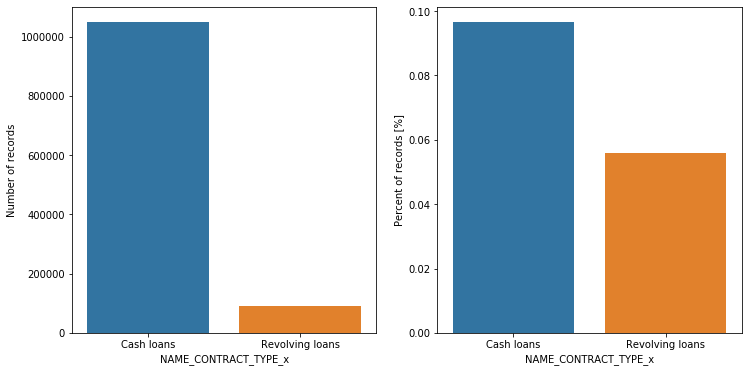

In [46]:
plot_graph('NAME_CONTRACT_TYPE_x')

From the above graphs we have found that the Revolving loans are small amount compared to Cash loans but the percentage of non payment for the revolving loans are comapritvely high .


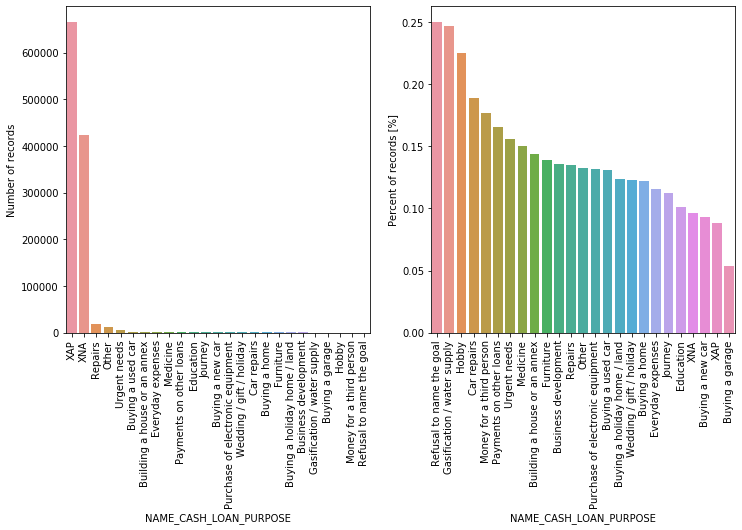

In [48]:
plot_graph('NAME_CASH_LOAN_PURPOSE', True, True)

#### The highest number of records belongs to the people who refused to state the reason for loan. Least number of people applied for loan for Buying a garage 

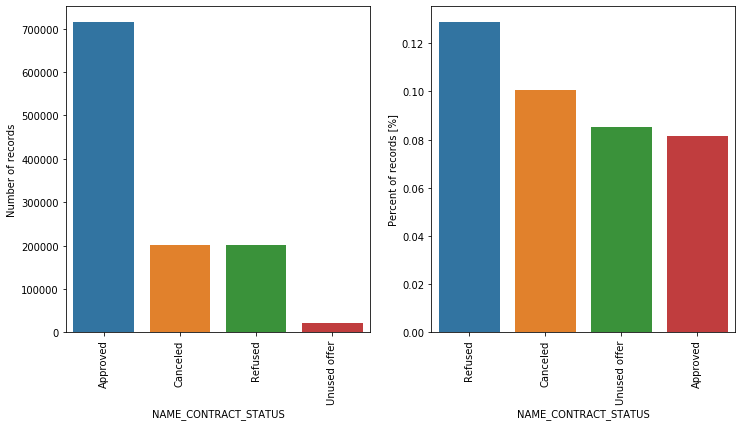

In [49]:
plot_graph('NAME_CONTRACT_STATUS', True, True)

The percentage of refused is more for the category 1 but still the people who didnt pay for after the approval is also more than 60% .

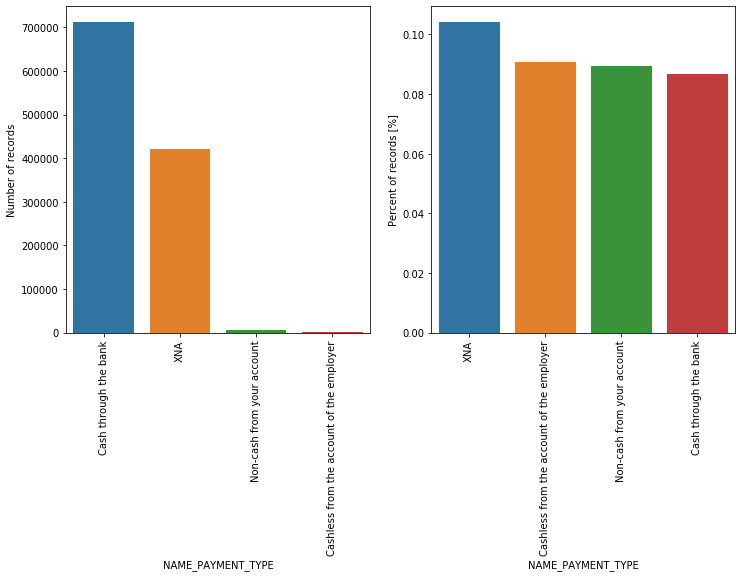

In [50]:
plot_graph('NAME_PAYMENT_TYPE', True, True)

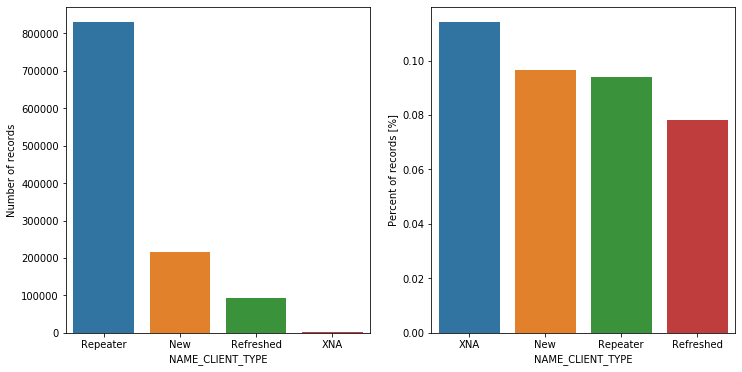

In [51]:
plot_graph('NAME_CLIENT_TYPE')

We can see that repeated customers are also not repaying the loans

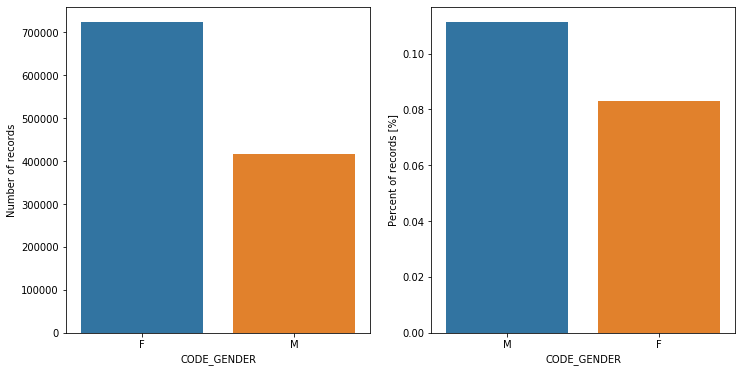

In [52]:
plot_graph('CODE_GENDER')

The percentage of defaulters are more in men than women

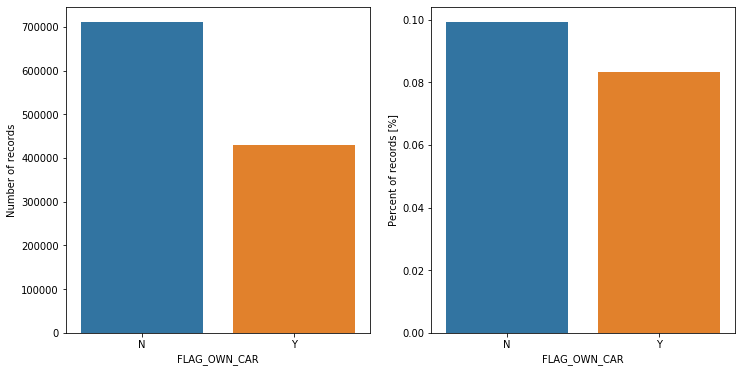

In [53]:
plot_graph('FLAG_OWN_CAR')

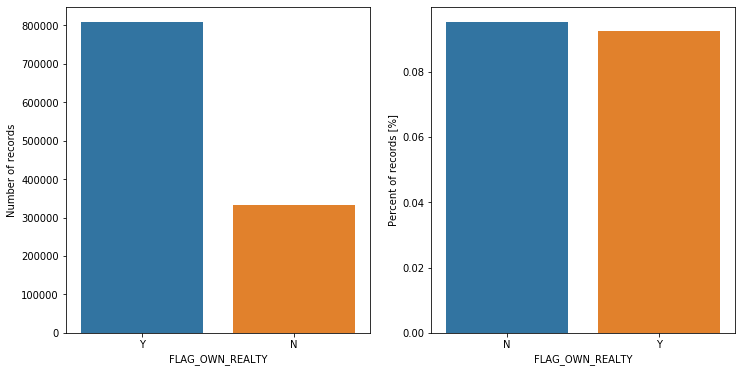

In [54]:
plot_graph('FLAG_OWN_REALTY')

In above both the cases, having there own reality and own car , the percentage of non payment are equally the same so this cannot be a factor to be cosidered .

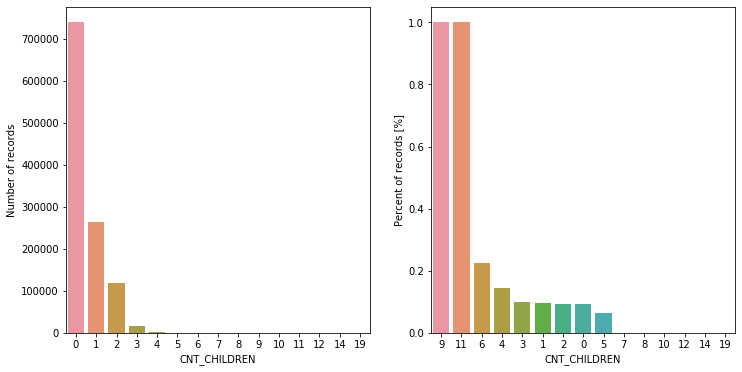

In [55]:
plot_graph('CNT_CHILDREN')

We can see that irrespective of 1,2,3,or 5 childeren the % of non payment is close but there is a difference for people with 6 , 4 ,9,11 kids

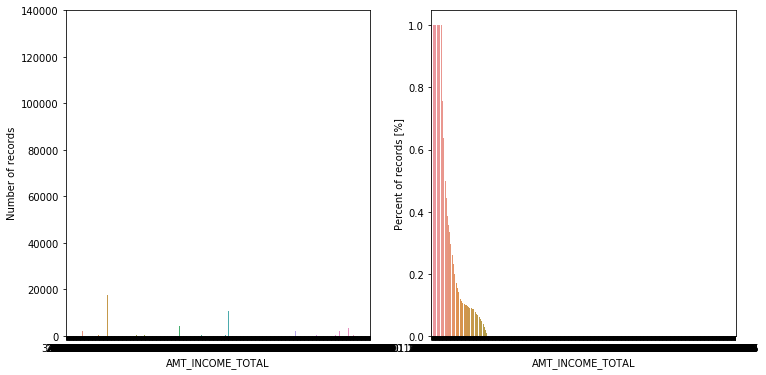

In [56]:
plot_graph('AMT_INCOME_TOTAL')

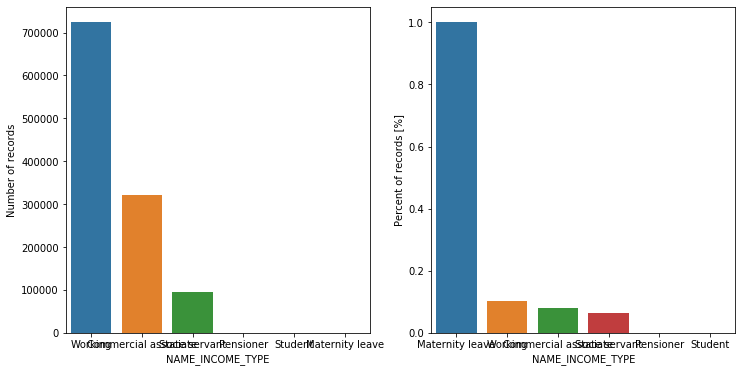

In [57]:
plot_graph('NAME_INCOME_TYPE')

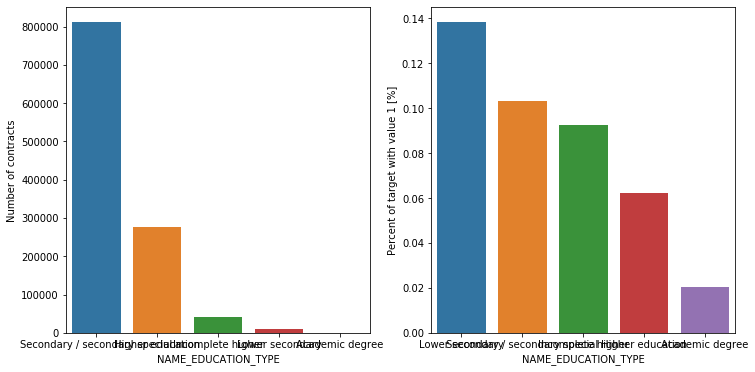

In [43]:
plot_graph('NAME_EDUCATION_TYPE')

Higher the education higher is the repayment rate

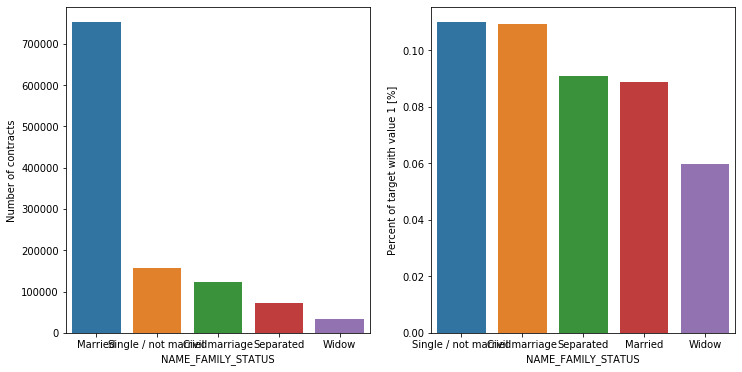

In [44]:
plot_graph('NAME_FAMILY_STATUS')

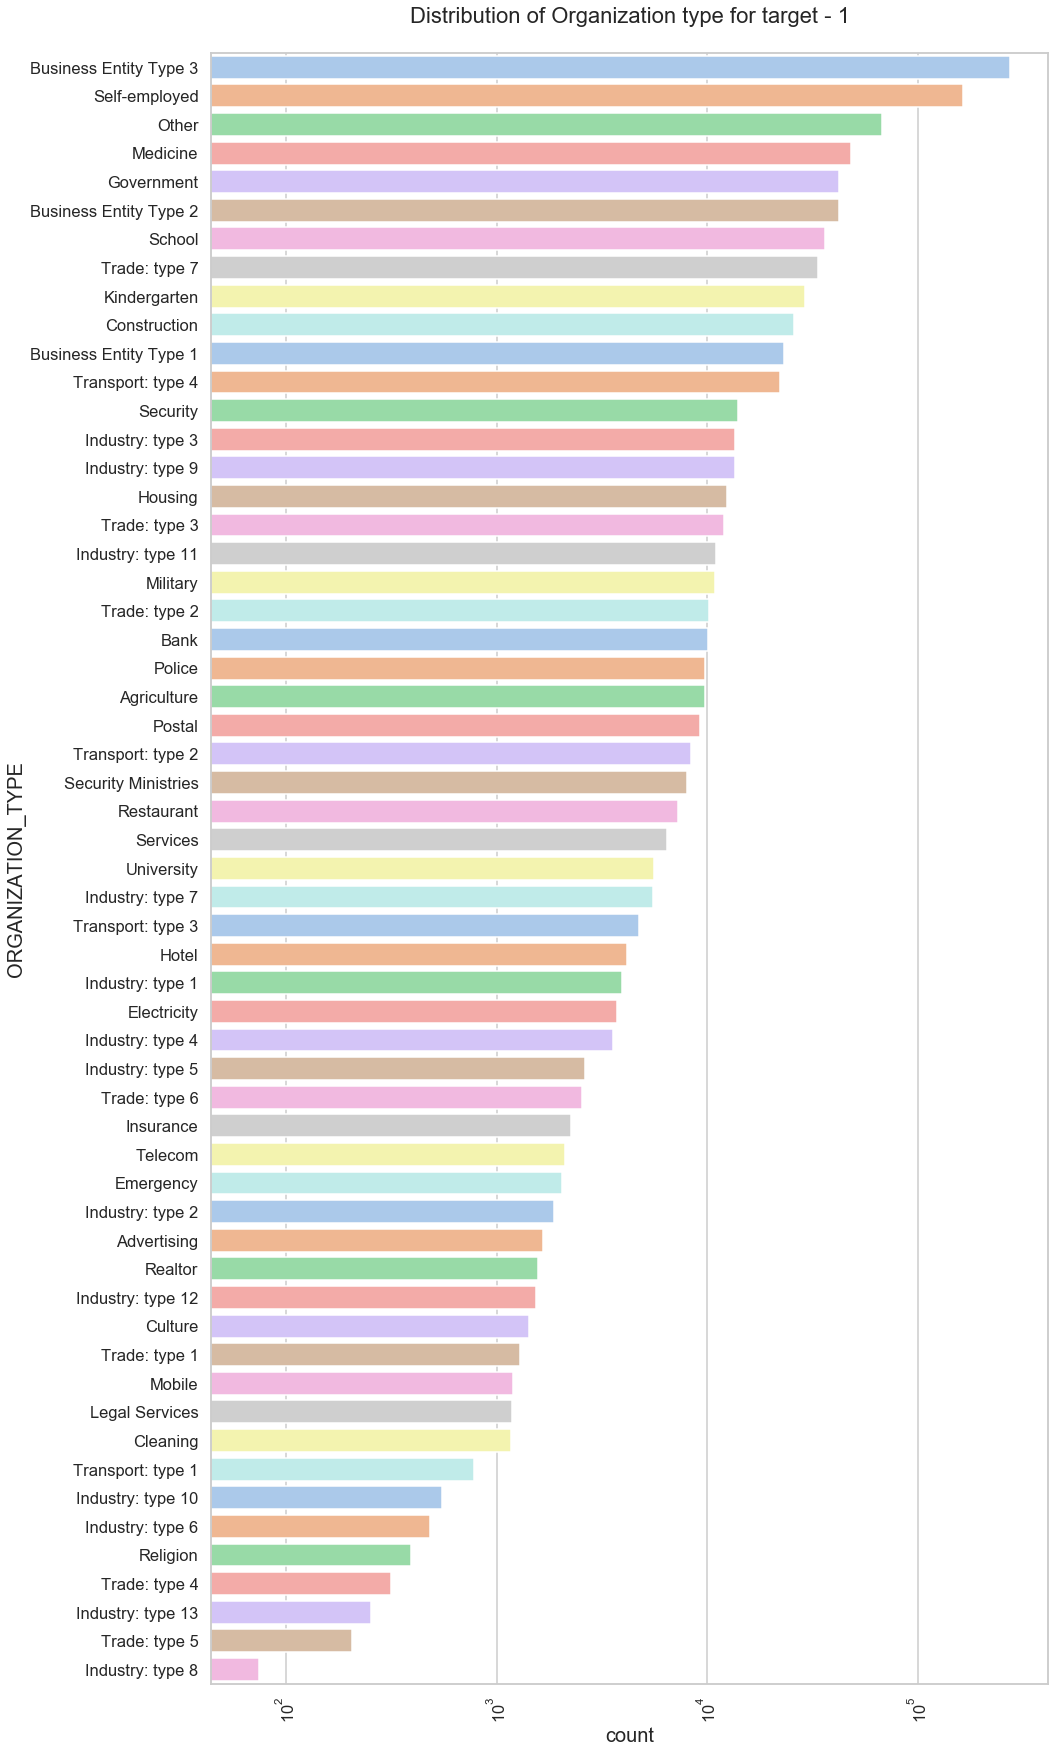

In [64]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='pastel')

plt.show()

In [65]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=data, x=col,orient='v')
    plt.show()
    

### For Target 0 - Finding any outliers

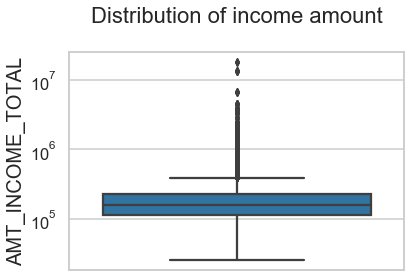

In [66]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

We can conclude from the graph above.

Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.

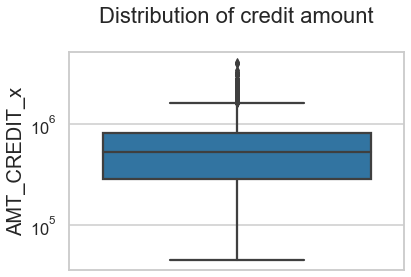

In [67]:
# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT_x',title='Distribution of credit amount')

Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.


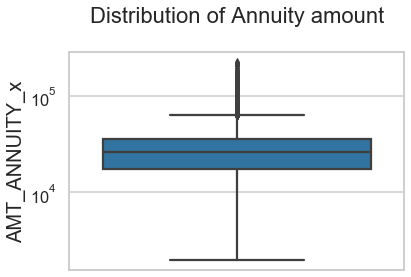

In [68]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY_x',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

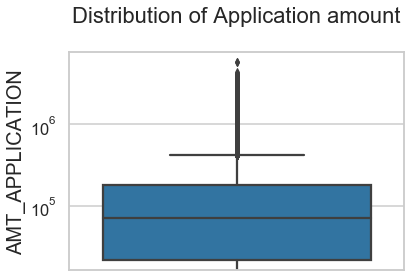

In [75]:
# Distribution of Application amount

univariate_numerical(data=target0_df,col='AMT_APPLICATION',title='Distribution of Application amount')

### For Target 1 - Finding any outliers

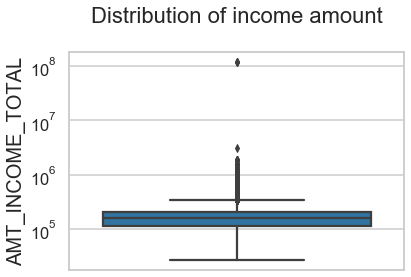

In [69]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

1.Some outliers are noticed in income amount.

2.The third quartiles is very slim for income amount.

3.Most of the clients of income are present in first quartile.

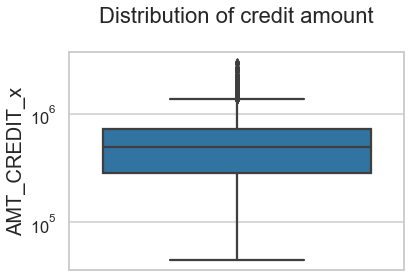

In [70]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT_x',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1.Some outliers are noticed in credit amount.

2.The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

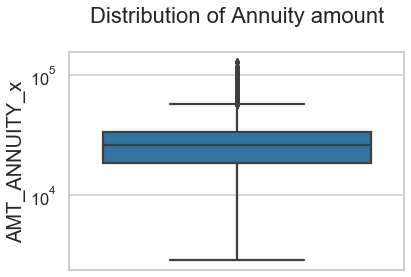

In [71]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY_x',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1.Some outliers are noticed in annuity amount.

2.The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

C:\Softwares\lib\site-packages\seaborn\categorical.py:486: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  **kws)


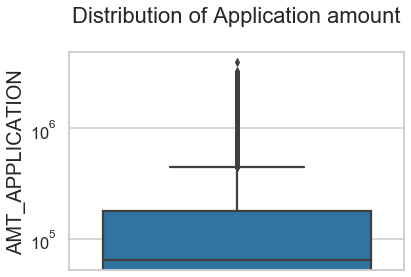

In [76]:
# Distribution of Application amount

univariate_numerical(data=target1_df,col='AMT_APPLICATION',title='Distribution of Application amount')

### Bivariate Analysis

### For Target 0

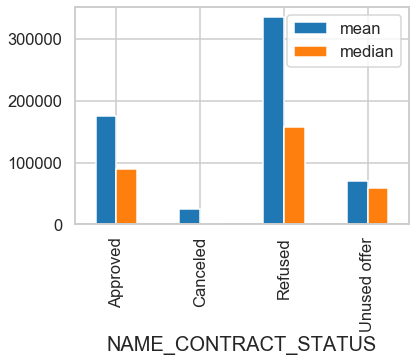

In [77]:
# For NAME_CONTRACT_STATUS and AMT_APPLICATION columns
target0_df.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()

The maximum credit amount from the historic data belongs to the Refused applications and the least to cancelled. we can conclude that most of the applications were refused and the least were cancelled.

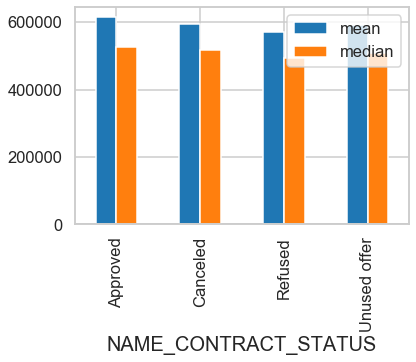

In [79]:
# NAME_CONTRACT_STATUS and AMT_CREDIT_x columns
target0_df.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_x'].aggregate(['mean','median']).plot.bar()

The Annuity amount is usually more than 25000 for all kind of application status. Hence, we can conclude that the Annuity amount doesn't impact the application status

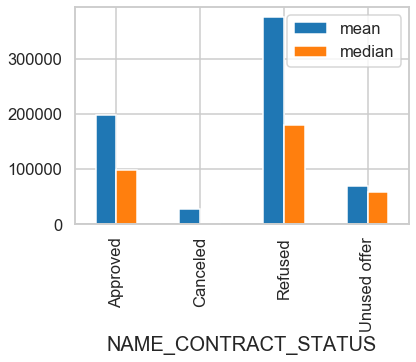

In [82]:
# NAME_CONTRACT_STATUS and AMT_CREDIT_y columns
target0_df.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y'].aggregate(['mean','median']).plot.bar()

The maximum credit amount from the historic data belongs to the Refused applications and the least to cancelled. we can conclude that most of the applications were refused and the least were cancelled.

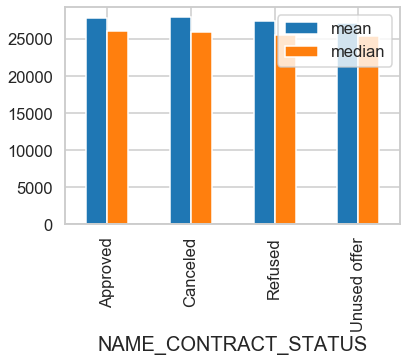

In [84]:
# NAME_CONTRACT_STATUS and AMT_ANNUITY_x columns
target0_df.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_x'].aggregate(['mean','median']).plot.bar()

#### The Annuity amount is usually more than 25000 for all kind of application status. Hence, we can conclude that the Annuity amount doesn't impact the application status

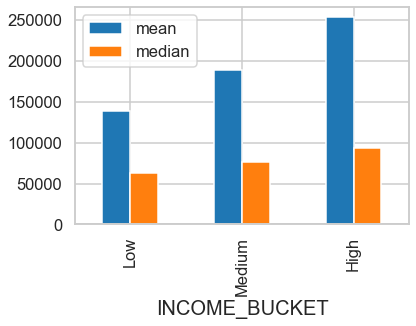

In [87]:
#INCOME_BUCKET and AMT_APPLICATION columns
target0_df.groupby('INCOME_BUCKET')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()


#### The ones in the High income bracket have requested for the higher amount of loan and the ones in the Low income bracket have requested for a lesser amount. We can say that the Income of a person determines how much loan is he asking for.

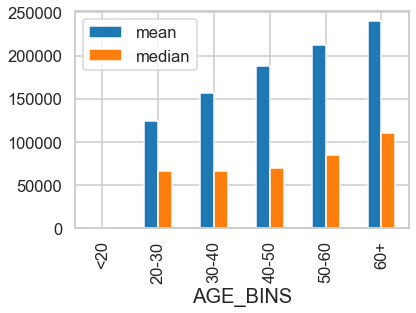

In [89]:
# AGE_BINS and AMT_APPLICATION columns
target0_df.groupby('AGE_BINS')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()

##### The people above 60 years have requested for the maximum loan and the ones less than 20 years have requested for the least amount

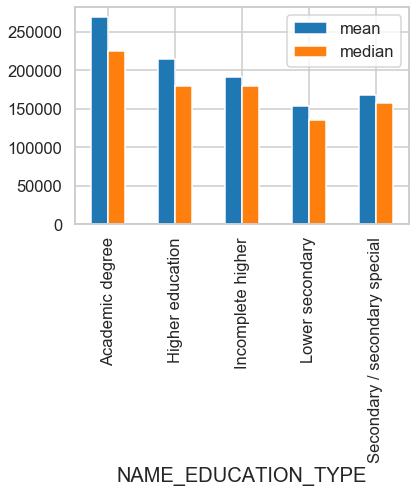

In [90]:
#NAME_EDUCATION_TYPE and AMT_INCOME_TOTAL columns
target0_df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()

#### The people having an academic degree constitute of the ones with highest income

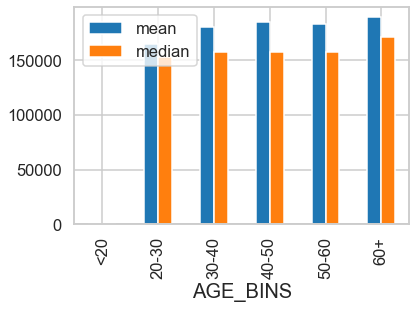

In [96]:
#AGE_BINS and AMT_INCOME_TOTAL columns
target0_df.groupby('AGE_BINS')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()

#### Though the age group less than 20 years have least income and the ones in 60+ bracket have the highest income, yet, we can see, there is not much of a difference between the mean income for all the the age groups more than 20 years

### For Target 1

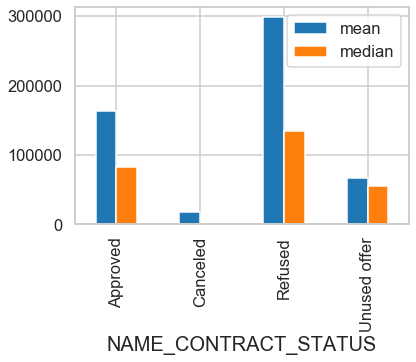

In [78]:
# For NAME_CONTRACT_STATUS and AMT_APPLICATION columns
target1_df.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()

#### The maximum amount of application from the historic data belongs to the Refused applications and the least to cancelled. we can conclude that most of the applications were refused and the least were cancelled.

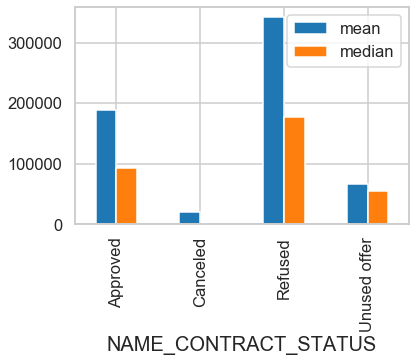

In [81]:
# NAME_CONTRACT_STATUS and AMT_CREDIT_y columns
target1_df.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y'].aggregate(['mean','median']).plot.bar()

#### The maximum credit amount from the historic data belongs to the Refused applications and the least to cancelled. we can conclude that most of the applications were refused and the least were cancelled.

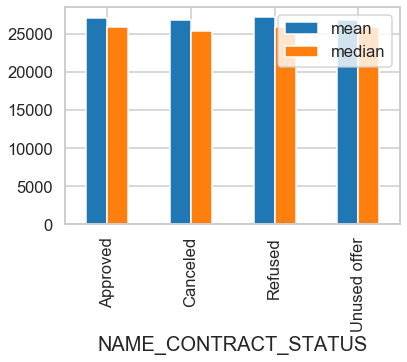

In [85]:
# NAME_CONTRACT_STATUS and AMT_ANNUITY_x columns
target1_df.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_x'].aggregate(['mean','median']).plot.bar()

#### The Annuity amount is usually more than 25000 for all kind of application status. Hence, we can conclude that the Annuity amount doesn't impact the application status

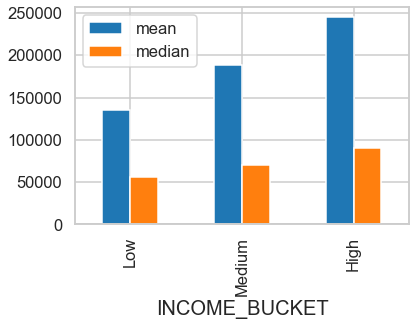

In [86]:
#INCOME_BUCKET and AMT_APPLICATION columns
target1_df.groupby('INCOME_BUCKET')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()


#### The peoplewith higher income request for higher amount of loan

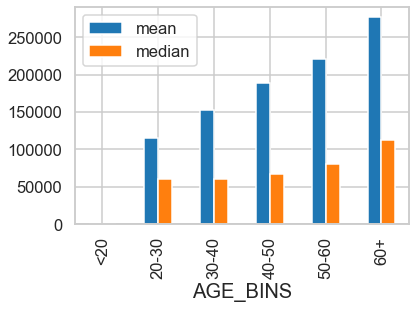

In [88]:
# AGE_BINS and AMT_APPLICATION columns
target1_df.groupby('AGE_BINS')['AMT_APPLICATION'].aggregate(['mean','median']).plot.bar()

##### The amount requested for loan increases with increasing age as peo-ple with less thn 20 yrs of Age have requested the least amount and the ones with more than 60 years of age have requested the highest

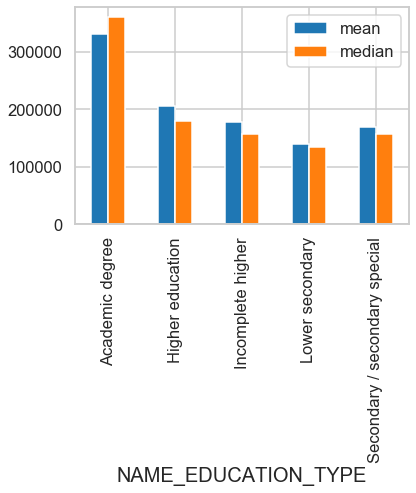

In [91]:
#NAME_EDUCATION_TYPE and AMT_INCOME_TOTAL columns
target1_df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()

##### The highest mean for the Totak income is for the people with an Academic Degree. People having studied till Lower Secondary have least mean and median income

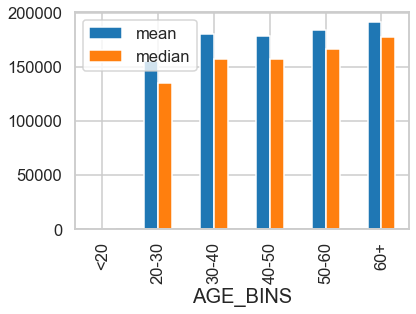

In [95]:
#AGE_BINS and AMT_INCOME_TOTAL columns
target1_df.groupby('AGE_BINS')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()

##### We see from this graph that the highest mean and median for Total income is forAge group 60+

### Columns with 10 highest corelation

In [121]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr()
target1=target1_corr.corr()

In [122]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,CNT_PAYMENT,AGE,YEARS_EMPLOYED
CNT_CHILDREN,1.000000,-0.012578,-0.016363,-0.000246,-0.026391,0.169174,-0.105298,-0.016002,-0.010179,-0.004076,0.010280,0.017043,0.018282,-0.046288,-0.036291,-0.038817,-0.052246,-0.043060,-0.279930,-0.072928
AMT_INCOME_TOTAL,-0.012578,1.000000,0.306306,0.381769,0.152886,0.029197,-0.016825,0.058886,0.116506,0.108691,-0.006530,-0.016837,-0.007659,0.217980,0.138511,0.135963,0.173089,0.044072,0.052488,0.032472
AMT_CREDIT_x,-0.016363,0.306306,1.000000,0.747688,0.089175,-0.017353,-0.016709,0.017443,0.043605,0.045958,-0.035379,-0.032557,-0.011468,0.146575,0.115904,0.113235,0.132879,0.040644,0.144410,0.087172
AMT_ANNUITY_x,-0.000246,0.381769,0.747688,1.000000,0.105717,0.016488,-0.007136,0.038130,0.071341,0.067019,-0.015570,-0.022994,-0.011059,0.200254,0.111985,0.106823,0.133343,0.001812,0.072628,0.046340
REGION_POPULATION_RELATIVE,-0.026391,0.152886,0.089175,0.105717,1.000000,-0.059643,-0.006472,-0.008335,0.061496,0.086669,-0.053821,-0.043029,-0.012494,0.084639,0.047580,0.048539,0.058634,0.003750,0.054012,0.002347
DAYS_REGISTRATION,0.169174,0.029197,-0.017353,0.016488,-0.059643,1.000000,0.029071,0.022996,0.020221,0.011769,0.049287,0.059280,0.035663,-0.016149,-0.019006,-0.020715,-0.026041,-0.027388,-0.296593,-0.168804
DAYS_ID_PUBLISH,-0.105298,-0.016825,-0.016709,-0.007136,-0.006472,0.029071,1.000000,0.024674,0.021875,0.012088,0.045526,0.031174,0.004954,-0.005722,-0.010087,-0.010558,-0.010993,-0.009244,-0.086061,-0.074698
REG_REGION_NOT_LIVE_REGION,-0.016002,0.058886,0.017443,0.038130,-0.008335,0.022996,0.024674,1.000000,0.441194,0.087368,0.311919,0.128772,0.004007,0.014459,0.004691,0.003842,0.004250,-0.009974,-0.051779,-0.050433
REG_REGION_NOT_WORK_REGION,-0.010179,0.116506,0.043605,0.071341,0.061496,0.020221,0.021875,0.441194,1.000000,0.874522,0.129047,0.209363,0.177897,0.034340,0.015205,0.014524,0.017221,-0.010697,-0.038377,-0.079324
LIVE_REGION_NOT_WORK_REGION,-0.004076,0.108691,0.045958,0.067019,0.086669,0.011769,0.012088,0.087368,0.874522,1.000000,0.013911,0.165645,0.214313,0.032918,0.015648,0.015197,0.017979,-0.008045,-0.017372,-0.063316


From the above correlation we can infer the following:

1.Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

2.Credit amount is inversely proportional to the number of children , means Credit amount is higher for less children count client have and vice-versa.

3.Income amount is inversely proportional to the number of children , means more income for less children client have and vice-versa.

4.Less children client have in densely populated area.

5.Credit amount is higher to densely populated area.

6.The income is also higher in densely populated area.

In [123]:
# Correlation for target 0

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,CNT_PAYMENT,AGE,YEARS_EMPLOYED
CNT_CHILDREN,1.000000,-0.001682,-0.008942,0.015603,-0.020888,0.131645,-0.076316,-0.022384,-0.034054,-0.026685,-0.010292,0.009932,0.023807,-0.038679,-0.026949,-0.029168,-0.041726,-0.031866,-0.217488,-0.045131
AMT_INCOME_TOTAL,-0.001682,1.000000,0.040992,0.051662,0.012557,-0.003768,-0.007480,0.008187,0.016484,0.015075,-0.003175,-0.006224,-0.004056,0.031702,0.019146,0.018657,0.020259,0.006720,0.012933,0.001224
AMT_CREDIT_x,-0.008942,0.040992,1.000000,0.739689,0.062016,-0.029602,-0.039830,0.009907,0.023585,0.026136,-0.038971,-0.044976,-0.021667,0.136488,0.121344,0.119636,0.134580,0.054277,0.176947,0.111991
AMT_ANNUITY_x,0.015603,0.051662,0.739689,1.000000,0.068861,0.028846,-0.020758,0.035030,0.058884,0.052513,-0.012766,-0.022449,-0.011451,0.165181,0.101306,0.097238,0.118971,0.017844,0.073073,0.046110
REGION_POPULATION_RELATIVE,-0.020888,0.012557,0.062016,0.068861,1.000000,-0.047410,-0.017281,-0.032121,0.035530,0.058766,-0.060420,-0.046300,-0.011190,0.047165,0.026279,0.026427,0.029143,-0.004169,0.052684,0.020664
DAYS_REGISTRATION,0.131645,-0.003768,-0.029602,0.028846,-0.047410,1.000000,0.053036,0.007352,0.006374,0.004331,0.023717,0.047678,0.033136,-0.014945,-0.021374,-0.022970,-0.031852,-0.033173,-0.238782,-0.142984
DAYS_ID_PUBLISH,-0.076316,-0.007480,-0.039830,-0.020758,-0.017281,0.053036,1.000000,0.019760,0.013565,0.004109,0.041257,0.016832,-0.009749,-0.018214,-0.026121,-0.027689,-0.030688,-0.029118,-0.107056,-0.084107
REG_REGION_NOT_LIVE_REGION,-0.022384,0.008187,0.009907,0.035030,-0.032121,0.007352,0.019760,1.000000,0.470624,0.061527,0.294362,0.136952,-0.014910,0.011076,0.005287,0.005465,0.001226,-0.013455,-0.035339,-0.050621
REG_REGION_NOT_WORK_REGION,-0.034054,0.016484,0.023585,0.058884,0.035530,0.006374,0.013565,0.470624,1.000000,0.872302,0.120643,0.213819,0.184171,0.028381,0.008548,0.007394,0.006708,-0.015787,-0.016609,-0.076182
LIVE_REGION_NOT_WORK_REGION,-0.026685,0.015075,0.026136,0.052513,0.058766,0.004331,0.004109,0.061527,0.872302,1.000000,-0.004982,0.168570,0.227400,0.026950,0.007941,0.007551,0.008418,-0.008953,-0.001653,-0.060870


Target 1 has same observation as Target0 . Few points are different:

1. The client's permanent address does not match contact address are having less children and vice-versa

2. the client's permanent address does not match work address are having less children and vice-versa


In [124]:
target0_df.corr().unstack().reset_index()

,level_0,level_1,0
0,TARGET,TARGET,NaN
1,TARGET,CNT_CHILDREN,NaN
2,TARGET,AMT_INCOME_TOTAL,NaN
3,TARGET,AMT_CREDIT_x,NaN
4,TARGET,AMT_ANNUITY_x,NaN
...,...,...,...
436,YEARS_EMPLOYED,AMT_CREDIT_y,0.047755
437,YEARS_EMPLOYED,AMT_GOODS_PRICE,0.054414
438,YEARS_EMPLOYED,CNT_PAYMENT,0.042113
439,YEARS_EMPLOYED,AGE,0.333857


In [125]:
corr = target0_df.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,CNT_PAYMENT,AGE,YEARS_EMPLOYED
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,-0.012578,-0.016363,-0.000246,-0.026391,0.169174,-0.105298,-0.016002,-0.010179,...,0.010280,0.017043,0.018282,-0.046288,-0.036291,-0.038817,-0.052246,-0.043060,-0.279930,-0.072928
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.306306,0.381769,0.152886,0.029197,-0.016825,0.058886,0.116506,...,-0.006530,-0.016837,-0.007659,0.217980,0.138511,0.135963,0.173089,0.044072,0.052488,0.032472
AMT_CREDIT_x,NaN,NaN,NaN,NaN,0.747688,0.089175,-0.017353,-0.016709,0.017443,0.043605,...,-0.035379,-0.032557,-0.011468,0.146575,0.115904,0.113235,0.132879,0.040644,0.144410,0.087172
AMT_ANNUITY_x,NaN,NaN,NaN,NaN,NaN,0.105717,0.016488,-0.007136,0.038130,0.071341,...,-0.015570,-0.022994,-0.011059,0.200254,0.111985,0.106823,0.133343,0.001812,0.072628,0.046340
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,-0.059643,-0.006472,-0.008335,0.061496,...,-0.053821,-0.043029,-0.012494,0.084639,0.047580,0.048539,0.058634,0.003750,0.054012,0.002347
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029071,0.022996,0.020221,...,0.049287,0.059280,0.035663,-0.016149,-0.019006,-0.020715,-0.026041,-0.027388,-0.296593,-0.168804
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024674,0.021875,...,0.045526,0.031174,0.004954,-0.005722,-0.010087,-0.010558,-0.010993,-0.009244,-0.086061,-0.074698
REG_REGION_NOT_LIVE_REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441194,...,0.311919,0.128772,0.004007,0.014459,0.004691,0.003842,0.004250,-0.009974,-0.051779,-0.050433
REG_REGION_NOT_WORK_REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.129047,0.209363,0.177897,0.034340,0.015205,0.014524,0.017221,-0.010697,-0.038377,-0.079324


In [126]:
corrdf = corr.unstack().reset_index()

In [127]:
corrdf.columns = ['Column1', 'Column2', 'Correlation']

In [128]:
corrdf.head()

,Column1,Column2,Correlation
0,TARGET,TARGET,NaN
1,TARGET,CNT_CHILDREN,NaN
2,TARGET,AMT_INCOME_TOTAL,NaN
3,TARGET,AMT_CREDIT_x,NaN
4,TARGET,AMT_ANNUITY_x,NaN


In [129]:
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf

,Column1,Column2,Correlation
43,AMT_INCOME_TOTAL,CNT_CHILDREN,-0.012578
64,AMT_CREDIT_x,CNT_CHILDREN,-0.016363
65,AMT_CREDIT_x,AMT_INCOME_TOTAL,0.306306
85,AMT_ANNUITY_x,CNT_CHILDREN,-0.000246
86,AMT_ANNUITY_x,AMT_INCOME_TOTAL,0.381769
...,...,...,...
435,YEARS_EMPLOYED,AMT_APPLICATION,0.047029
436,YEARS_EMPLOYED,AMT_CREDIT_y,0.047755
437,YEARS_EMPLOYED,AMT_GOODS_PRICE,0.054414
438,YEARS_EMPLOYED,CNT_PAYMENT,0.042113


In [130]:
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()

In [132]:
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Column1,Column2,Correlation
372,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
373,AMT_GOODS_PRICE,AMT_CREDIT_y,0.99
351,AMT_CREDIT_y,AMT_APPLICATION,0.97
219,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
285,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
371,AMT_GOODS_PRICE,AMT_ANNUITY_y,0.82
350,AMT_CREDIT_y,AMT_ANNUITY_y,0.82
329,AMT_APPLICATION,AMT_ANNUITY_y,0.81
87,AMT_ANNUITY_x,AMT_CREDIT_x,0.75
395,CNT_PAYMENT,AMT_GOODS_PRICE,0.68


In [133]:
target1_df.corr().unstack().reset_index()

,level_0,level_1,0
0,TARGET,TARGET,NaN
1,TARGET,CNT_CHILDREN,NaN
2,TARGET,AMT_INCOME_TOTAL,NaN
3,TARGET,AMT_CREDIT_x,NaN
4,TARGET,AMT_ANNUITY_x,NaN
...,...,...,...
436,YEARS_EMPLOYED,AMT_CREDIT_y,0.067442
437,YEARS_EMPLOYED,AMT_GOODS_PRICE,0.080591
438,YEARS_EMPLOYED,CNT_PAYMENT,0.071681
439,YEARS_EMPLOYED,AGE,0.292894


In [134]:
corr1 = target1_df.corr()

corr1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr1

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,CNT_PAYMENT,AGE,YEARS_EMPLOYED
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,-0.001682,-0.008942,0.015603,-0.020888,0.131645,-0.076316,-0.022384,-0.034054,...,-0.010292,0.009932,0.023807,-0.038679,-0.026949,-0.029168,-0.041726,-0.031866,-0.217488,-0.045131
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.040992,0.051662,0.012557,-0.003768,-0.007480,0.008187,0.016484,...,-0.003175,-0.006224,-0.004056,0.031702,0.019146,0.018657,0.020259,0.006720,0.012933,0.001224
AMT_CREDIT_x,NaN,NaN,NaN,NaN,0.739689,0.062016,-0.029602,-0.039830,0.009907,0.023585,...,-0.038971,-0.044976,-0.021667,0.136488,0.121344,0.119636,0.134580,0.054277,0.176947,0.111991
AMT_ANNUITY_x,NaN,NaN,NaN,NaN,NaN,0.068861,0.028846,-0.020758,0.035030,0.058884,...,-0.012766,-0.022449,-0.011451,0.165181,0.101306,0.097238,0.118971,0.017844,0.073073,0.046110
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,-0.047410,-0.017281,-0.032121,0.035530,...,-0.060420,-0.046300,-0.011190,0.047165,0.026279,0.026427,0.029143,-0.004169,0.052684,0.020664
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053036,0.007352,0.006374,...,0.023717,0.047678,0.033136,-0.014945,-0.021374,-0.022970,-0.031852,-0.033173,-0.238782,-0.142984
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019760,0.013565,...,0.041257,0.016832,-0.009749,-0.018214,-0.026121,-0.027689,-0.030688,-0.029118,-0.107056,-0.084107
REG_REGION_NOT_LIVE_REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470624,...,0.294362,0.136952,-0.014910,0.011076,0.005287,0.005465,0.001226,-0.013455,-0.035339,-0.050621
REG_REGION_NOT_WORK_REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.120643,0.213819,0.184171,0.028381,0.008548,0.007394,0.006708,-0.015787,-0.016609,-0.076182


In [135]:
corr_target1 = corr1.unstack().reset_index()

In [136]:
corr_target1.columns = ['Column1', 'Column2', 'Correlation']

In [137]:
corr_target1.head()

,Column1,Column2,Correlation
0,TARGET,TARGET,NaN
1,TARGET,CNT_CHILDREN,NaN
2,TARGET,AMT_INCOME_TOTAL,NaN
3,TARGET,AMT_CREDIT_x,NaN
4,TARGET,AMT_ANNUITY_x,NaN


In [138]:
corr_target1.dropna(subset = ['Correlation'], inplace = True)

In [139]:
corr_target1['Correlation'] = round(corr_target1['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corr_target1['Correlation'] = corr_target1['Correlation'].abs()

In [140]:
corr_target1.sort_values(by = 'Correlation', ascending = False).head(10)

,Column1,Column2,Correlation
372,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
373,AMT_GOODS_PRICE,AMT_CREDIT_y,0.99
351,AMT_CREDIT_y,AMT_APPLICATION,0.97
219,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
371,AMT_GOODS_PRICE,AMT_ANNUITY_y,0.84
350,AMT_CREDIT_y,AMT_ANNUITY_y,0.84
329,AMT_APPLICATION,AMT_ANNUITY_y,0.82
285,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
87,AMT_ANNUITY_x,AMT_CREDIT_x,0.74
393,CNT_PAYMENT,AMT_APPLICATION,0.70


##### We see here, that though the corelation values differs, the top 10 columns with highest corelation are the same for both, Target =0 and Target =1